In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#!pip install git+git://github.com/hammerlab/cohorts
import pandas as pd
from query_tcga import cohort
import cohorts
from cohorts.functions import missense_snv_count

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: No module named 'log_with'

In [3]:
blca_patients = cohort.prep_cohort_patients(project_name='TCGA-BLCA')
blca_cohort = cohort.prep_cohort(patients=blca_patients)

{'dataframe_hash': 8814453162628095830,
 'provenance_file_summary': {'cohorts': '0.2.0+6.g205397b',
                             'isovar': '0.0.6',
                             'mhctools': '0.2.3',
                             'numpy': '1.11.1',
                             'pandas': '0.18.1',
                             'pyensembl': '0.9.7',
                             'scipy': '0.17.0',
                             'topiary': '0.0.21',
                             'varcode': '0.4.15'}}


## retrieve dataframe for a cohort

In [4]:
df = blca_cohort.as_dataframe()
df.describe()

/Users/jacquelineburos/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age_at_diagnosis,bcg_complete_response_months,birth_days_to,course_number,death_days_to,ecog_score,form_completion_day,form_completion_month,form_completion_year,gleason_score,...,tobacco_smoking_history_indicator,tobacco_smoking_pack_years_smoked,tobacco_smoking_year_stopped,total_dose,weight_kg_at_diagnosis,progressed_time,deceased_time,censor_time,pfs,os
count,19.000000,5.000000,411.000000,3.0,180.000000,101.000000,412.000000,412.000000,412.000000,85.000000,...,399.000000,224.000000,174.000000,3.000000,369.000000,144.000000,180.000000,356.000000,412.000000,412.000000
mean,69.789474,15.800000,-25037.194647,1.0,552.844444,0.871287,16.245146,6.645631,2013.713592,6.352941,...,2.458647,39.038616,1989.045977,876.333333,80.979024,538.145833,552.844444,724.337079,712.223301,750.766990
std,12.523662,10.009995,3866.484080,0.0,531.947059,0.770238,8.110886,3.295748,1.034918,0.611514,...,1.161644,52.926227,16.714127,649.138147,23.735788,632.722235,531.947059,831.200983,798.099402,795.075154
min,48.000000,6.000000,-32918.000000,1.0,19.000000,0.000000,1.000000,1.000000,2010.000000,5.000000,...,1.000000,0.150000,1946.000000,129.000000,41.000000,16.000000,19.000000,-64.000000,-64.000000,-64.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,4.000000,2013.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.000000,261.750000
50%,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,7.000000,2014.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,432.500000,485.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,9.000000,2014.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834.500000,861.750000
max,90.000000,27.000000,-12557.000000,1.0,3183.000000,4.000000,31.000000,12.000000,2015.000000,9.000000,...,5.000000,730.000000,2013.000000,1300.000000,292.000000,4907.000000,3183.000000,4967.000000,4967.000000,4967.000000


## plot survival

Missing tobacco_smoking_history_indicator for 13 patients: from 412 to 399
# no condition 201
# with condition 198


<lifelines.StatisticalResult: 
Results
   alpha: 0.95
   df: 1
   t 0: -1
   null distribution: chi squared
   test: logrank

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.45433 |              0.560 |  Cannot Reject Null |       False       
>

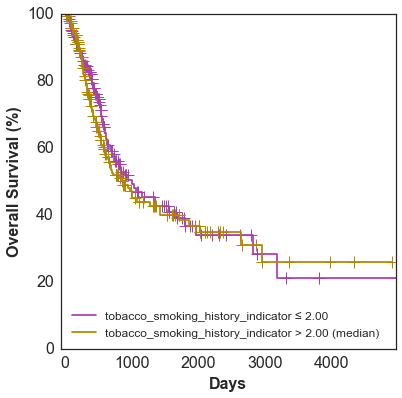

In [5]:
blca_cohort.plot_survival(on='tobacco_smoking_history_indicator')

Missing tobacco_smoking_history_indicator for 13 patients: from 412 to 399
# no condition 111
# with condition 288


<lifelines.StatisticalResult: 
Results
   alpha: 0.95
   df: 1
   t 0: -1
   null distribution: chi squared
   test: logrank

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.13237 |              2.264 |  Cannot Reject Null |       False       
>

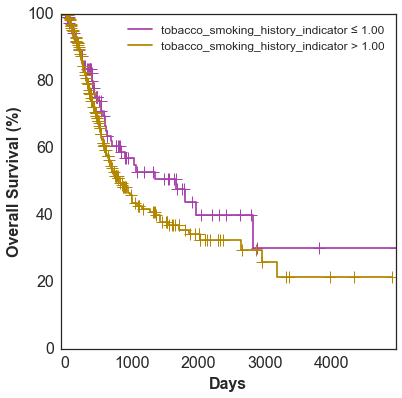

In [6]:
blca_cohort.plot_survival(on='tobacco_smoking_history_indicator', threshold=1)

Missing tobacco_smoking_history_indicator for 13 patients: from 412 to 399
# no condition 111
# with condition 288


<lifelines.StatisticalResult: 
Results
   alpha: 0.95
   df: 1
   t 0: -1
   null distribution: chi squared
   test: logrank

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.25666 |              1.287 |  Cannot Reject Null |       False       
>

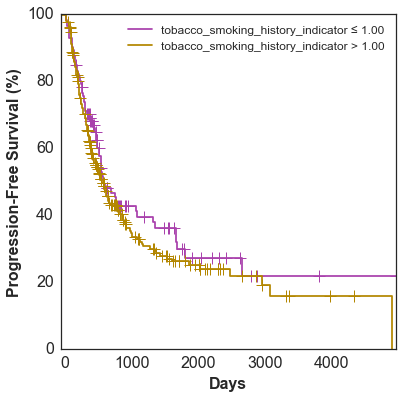

In [7]:
blca_cohort.plot_survival(on='tobacco_smoking_history_indicator', threshold=1, how='pfs')

In [8]:
def smoking(row):
    return row['tobacco_smoking_history_indicator']
blca_cohort.plot_survival({"smoking": smoking}, threshold=1, how='pfs')

AttributeError: 'dict' object has no attribute 'iteritems'

## Summarizing somatic mutation burden

In [ ]:
blca_cohort.plot_survival(on=missense_snv_count)